# Power & Sample Size assessment for differential expression analysis of RNA-Seq experiments using PROPER
Hao Wu, Chi Wang, Zhijin Wu (2014): PROPER: Comprehensive Power
  Evaluation for Differential Expression using RNA-seq. Bioinformatics.
  doi:10.1093/bioinformatics/btu640
<br>
The original paper from Wu, Wang, and Wu introducing the concepts implemented in this package is available here https://academic.oup.com/bioinformatics/article/31/2/233/2366205
<br>
<br>
Briefly, PROspective Power Estimation for RNA-Seq (PROPER) simulates experimental conditions to assess adequete sample size and statistical power for differential expression (DE) analysis using two-group comparison. RNA-seq experimental designs require consideration of the desired False Discovery Rate (FDR), the choice of sequencing depth, and the procedure used to determine differential expression. PROPER accounts for all of these considerations and even provides pretty graphs to explain it.

###### Definition of terms
<br>
False Discovery Rate (FDR) tells you how likely it is that all genes identified as DE are false positives. A FDR of 5% means that among all genes called DE, an average of 5% of those are truly not DE.
<br>
<br>
False Discovery Cost (FDC) tells you the expected number of falsely identifed DE genes (false positives) you will have for every truly DE gene (true positives) at a pre-specified cut-off for DE. The lower FDC the better. 
<br>
<br>
False Positive Rate (FPR) tells you the expected number of false positives you will have for all genes identified as DE.

Our very first step is to load the PROPER package from Bioconductor. Please see http://bioconductor.org/ for information about installation and use of Bioconductor and its packages.

In [3]:
library (PROPER)

## Data Generation

Our scenario is based on the following simplified experimental conditions:

-Assuming 5% of genes are DE
<br>
The validity of this assumption depends on your specific experiment, this is just a guess for the sake of the example.

-testing 18000 genes
<br>
This is just a nice round number similar to the numbers of genes we typically see in our RNA-Seq projects at EICC.

-using the Cheung database
<br>
The Cheung database best simulates the inherent biological variation between unique, unrelated individuals. This will provide estimates of sample size assuming the greatest amount of biological variation. If your experiment has samples which are more similar to each other than unique, unrelated individuals, we would select a different database to better simulate the biological variation.

-50M read sequencing depth
<br>
This is the lowest sequencing depth we typically recommend but your mileage may vary. 

In [4]:
ourscenario = RNAseq.SimOptions.2grp(ngenes=18000, p.DE=0.05, lOD="cheung",seqDepth=50000000, sim.seed=100)

## DE Gene Detection

Next, we run the simulations to detect DE genes. We chose the minimum recommended 20 simulations. This is to balance the accuracy with the time this portion of the analysis takes. We have included the time stamp to show how long even this simplified example scenario can take at the minimum number of simulations. More simulations may lead to more accurate estimates but this is something we can test on a by-project basis.
<br>
<br>
We have chosen to simulate power for samples of 3,5,7,and 10 samples per treatment group (i.e. 10 cases and 10 controls) using edgeR. If you would like a power and sample size assessment from EICC the choice of simulated sample sizes and the choice of DE analysis package are ones we would tailor to your specific experiment.

In [18]:
start_time <- Sys.time()
simulations={runSims(Nreps = c(3,5,7,10), sim.opts=ourscenario,
               DEmethod="edgeR", nsims=20) }
end_time <- Sys.time()
end_time - start_time

Simulation number 1 
Simulation number 2 
Simulation number 3 
Simulation number 4 
Simulation number 5 
Simulation number 6 
Simulation number 7 
Simulation number 8 
Simulation number 9 
Simulation number 10 
Simulation number 11 
Simulation number 12 
Simulation number 13 
Simulation number 14 
Simulation number 15 
Simulation number 16 
Simulation number 17 
Simulation number 18 
Simulation number 19 
Simulation number 20 


Time difference of 4.239962 mins

## Power Assessment

Here we parameterize our power analysis. The chosen parameters will vary by experiment. If you do a power assessment with EICC we will discuss the appropriate parameters for your project.

In [19]:
power = comparePower(simulations, alpha.type="fdr", alpha.nominal=0.05,
                       strata = c(0, 10, 2^(1:7)*10, Inf), filter.by="expr",
                       strata.filtered=1, stratify.by="expr",delta=1)

In [20]:
summaryPower(power)

     SS1 SS2 Nominal FDR Actual FDR Marginal power Avg # of TD Avg # of FD  FDC
[1,]   3   3        0.05      0.420           0.44          45        34.0 0.76
[2,]   5   5        0.05      0.220           0.71          72        21.0 0.29
[3,]   7   7        0.05      0.130           0.84          85        14.0 0.16
[4,]  10  10        0.05      0.078           0.90          92         9.3 0.10


Given the experimental conditions of our scenario and assumptions we made about the percentae of DE genes, we would need to have 7 samples per experimental condition for a total of 14 samples in order to accurately detect 80% of DE genes with a standardized log fold change of 1.

###### Notes on sequencing depth
Do we really need more people or is greater resolution (i.e. sequencing depth) the answer? This is something that PROPER can assess and a question EICC would be happy to discuss with you.

## Plot Results
<br>
PROPER provides us with many options for visualizing the results of our analysis with publication-ready graphs and straight forward interpretations. Graphs could include the power, the number of true and false discoveries we could expect to find, estimated FDR, and false positive rate given various sample sizes along with customized graphs for your specific project.
<br>
<br>
Here is the power graph from our simplified example scenario. As the green line indicates, only sample sizes of 7 samples (green line) or 10 samples (blue line) per experimental condition achieve >80% power, the standard for statistical analyses. 

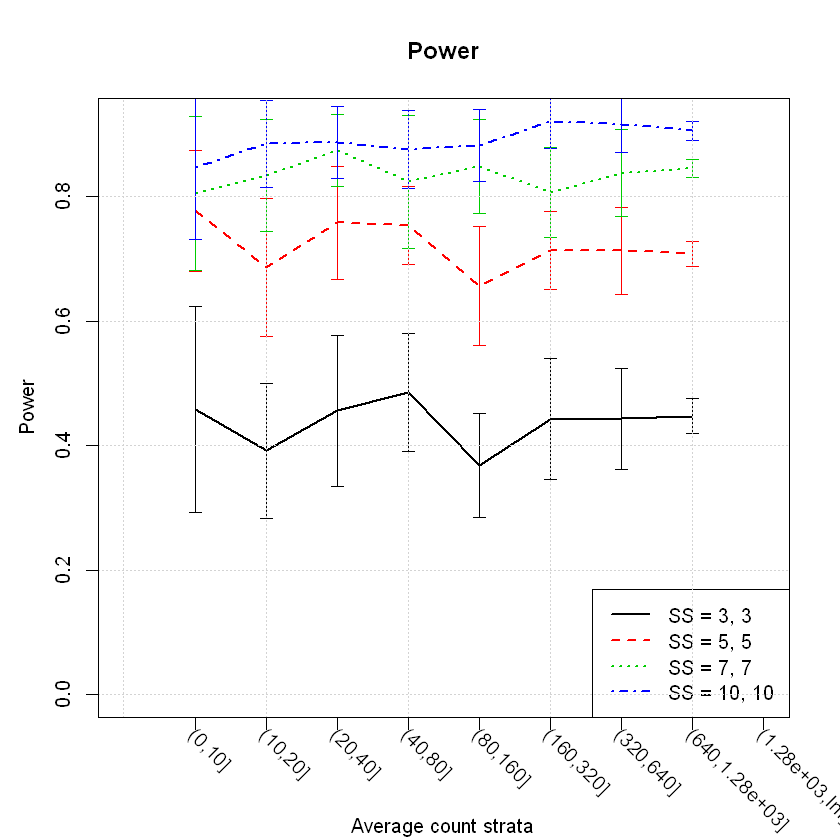

In [28]:
options(repr.plot.width=7, repr.plot.height=7)
plotPower(power)

The results we can obtain from PROPER are easily incorporated into grant applications and if you are interested in a power and sample size assessment for your project, please find our contact information here

https://www.cores.emory.edu/eicc/about/index.html

Session Information available below

In [23]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18362)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] repr_1.0.1    edgeR_3.26.6  limma_3.40.5  PROPER_1.16.0

loaded via a namespace (and not attached):
 [1] locfit_1.5-9.1  Rcpp_1.0.2      lattice_0.20-38 digest_0.6.20  
 [5] crayon_1.3.4    IRdisplay_0.7.0 grid_3.6.0      jsonlite_1.6   
 [9] evaluate_0.14   pillar_1.4.2    rlang_0.4.0     uuid_0.1-2     
[13] IRkernel_1.0.2  tools_3.6.0     compiler_3.6.0  base64enc_0.1-3
[17] htmltools_0.3.6 pbdZMQ_0.3-3   